# PROJECT: CALORIES BURNED PREDICTION

Importing the Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

# Data Collection

Loading the Calories Dataset

In [5]:
calories = pd.read_csv("calories.csv")

Printing the first 5 rows of dataset

In [6]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Loading the Excercise Dataset

In [7]:
exercise = pd.read_csv("exercise.csv")

Printing the first 5 rows of dataset

In [8]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


Combining the two Dataframe

In [9]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


# Data  Preprocessing

Finding number of Rows and Columns

In [11]:
calories_data.shape

(15000, 9)

Getting the data information

In [12]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


Checking the missing values

In [13]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Statistical Measures of the Dataset

In [14]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [15]:
sns.set()

Plotting the Gender column

H:\Setups\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

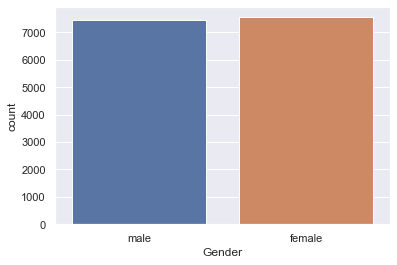

In [16]:
sns.countplot(calories_data['Gender'])

Distribution of "Age" column

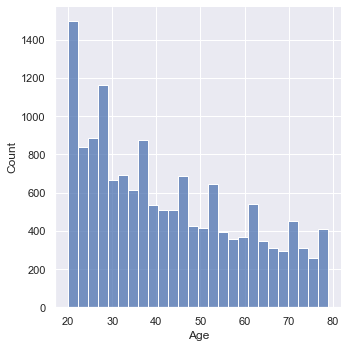

In [17]:
sns.displot(calories_data['Age'])

Distribution of "Height" column

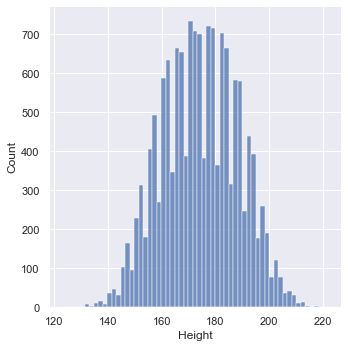

In [18]:
sns.displot(calories_data['Height'])

Distribution of "Weight" column

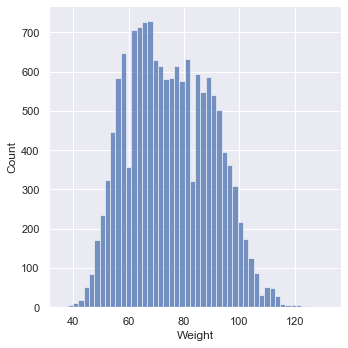

In [19]:
sns.displot(calories_data['Weight'])

Correlation in dataset

In [20]:
correlation = calories_data.corr()

Plotting Heatmap

<AxesSubplot:>

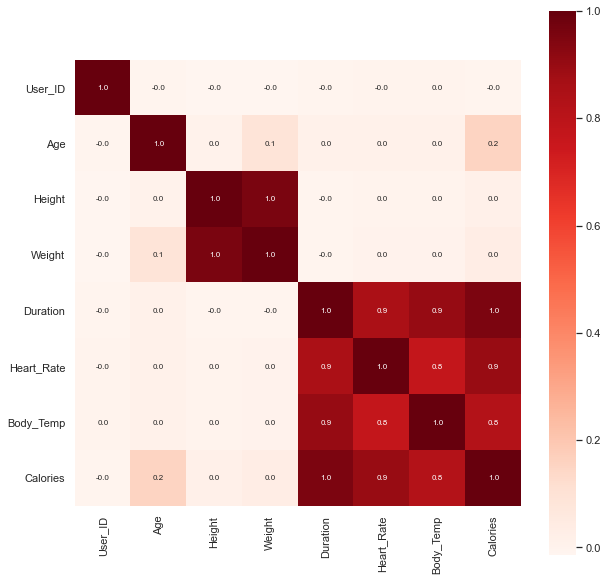

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Correlation: Explains how one or more variables are related to each other

   
   Each column will be compared with the other column.
    
       When value is large (say 1) : Columns are positively correlated
       
       When value is very less : Columns are negatively correlated
   
       When the value is small (say 0) : There is no correlation

Converting the text data with values in "Gender" column 

In [22]:
calories_data.replace({"Gender": {'male':0, 'female':1}}, inplace=True)

In [23]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


Separating Features and Target

In [24]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [25]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [26]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# Model Training

XGBoost Regressor:

XGBoost is a powerful approach for building supervised regression models and is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values.

Loading the model

In [29]:
model = XGBRegressor()

Training the model with X_train

In [30]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation

Prediction on Test Data

In [31]:
test_data_pred = model.predict(X_test) #Prediction on Test Data

In [32]:
print("Data :", test_data_pred)

Data : [127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean Absolute Error

In [33]:
mae = metrics.mean_absolute_error(Y_test, test_data_pred)

In [34]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.4807048829992613


Root Mean Square Error

In [35]:
rmse = np.sqrt(MSE(Y_test, test_data_pred))

In [36]:
print("Root Mean Square Error =", rmse)

Root Mean Square Error = 2.12938076108955


In [37]:
R2 = metrics.r2_score(Y_test, test_data_pred) #R squared score

In [38]:
print(R2)

0.9988455491362879
